In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [39]:
train.shape

(245725, 11)

In [40]:
test = pd.read_csv('/content/drive/MyDrive/test.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [41]:
test.shape

(105312, 10)

In [42]:
train.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,8ZL33CEC,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [43]:
# Droppinf ID columns as its each value is unique
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.7+ MB


In [45]:
train.isnull().sum()


Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [46]:
test.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [47]:
train.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [48]:
# Filling null values in credit_product with forward fill method
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

In [49]:
train.Credit_Product.value_counts()

No     163751
Yes     81974
Name: Credit_Product, dtype: int64

In [50]:
# Verifying null values
train.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


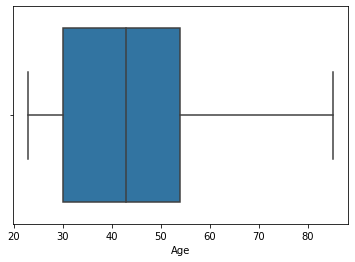

In [51]:
sns.boxplot(train.Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


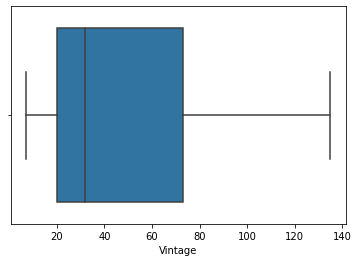

In [52]:
sns.boxplot(train.Vintage)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


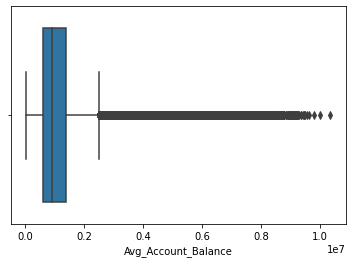

In [53]:
# Outliers are there for Avg_Account_Balance

sns.boxplot(train.Avg_Account_Balance)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


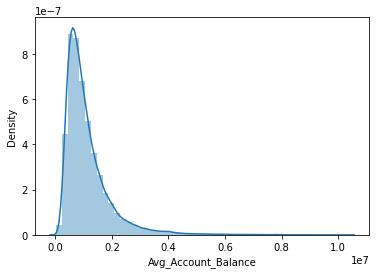

In [54]:
sns.distplot(train.Avg_Account_Balance)

In [55]:
train.Avg_Account_Balance.min()

20790

In [56]:
train.Avg_Account_Balance.max()

10352009

In [57]:
acc_with_high_bal = train[train.Avg_Account_Balance>400000]
acc_with_high_bal.shape[0]

226670

In [58]:
train.shape

(245725, 10)

In [59]:
# Removinh 3% outliers 
x = train.Avg_Account_Balance.quantile(0.97)
train_new = train[train.Avg_Account_Balance < x]
train_new.shape

(238351, 10)

In [74]:
train_new.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


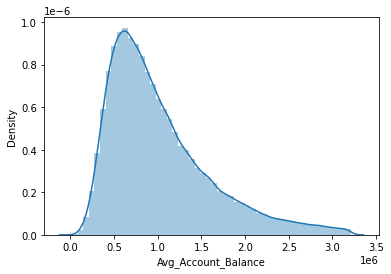

In [61]:
# Still skewness os there but better than previous
sns.distplot(train_new.Avg_Account_Balance)

In [75]:
Y=train_new[['Is_Lead']]

X=train_new.drop(['Is_Lead'],axis=1)

In [76]:
# Identifying categorical and numerical features
num=X.select_dtypes(include="number")
cat=X.select_dtypes(include="object")

In [77]:
num.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

In [78]:
cat.columns

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

In [79]:
num.head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


In [80]:
# Removing numerical features with zero variance
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [81]:
# none of numerical columns had zero variance
num_1.head()

,Age,Vintage,Avg_Account_Balance
0,73,43,1045696
1,30,32,581988
2,56,26,1484315
3,34,19,470454
4,30,33,886787


In [83]:
# Checking lead conversion percentage

train.Is_Lead.mean()

0.23720826126767727

In [85]:
# Binning numeric values into 10 bins on basis of their quartiles
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,Age_Rank,Vintage_Rank,Avg_Account_Balance_Rank
0,9.0,5.0,6.0
1,2.0,5.0,2.0
2,8.0,3.0,8.0
3,3.0,2.0,1.0
4,2.0,5.0,5.0


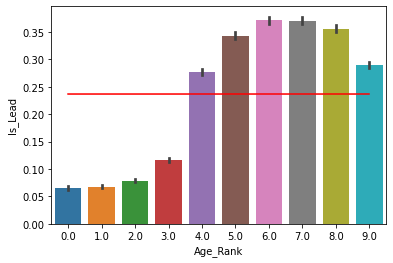

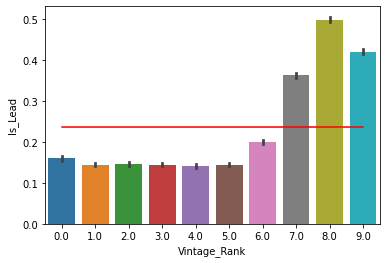

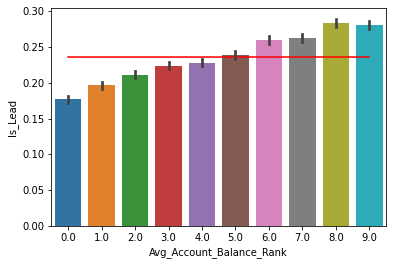

In [87]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Is_Lead'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="Is_Lead",data=X_bin_combined, estimator=mean )
plt.show()

# For all 3 variables there is a slope indicating higher their value higher changes of lead. Hence all can be good predictors

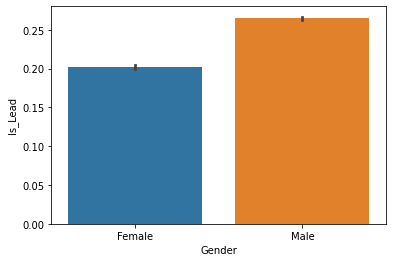

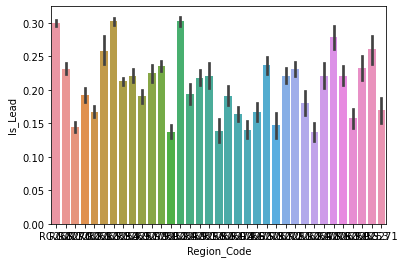

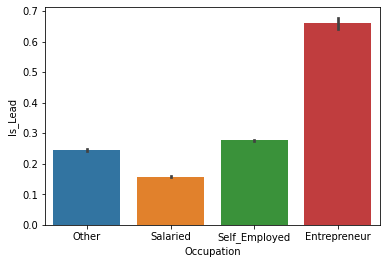

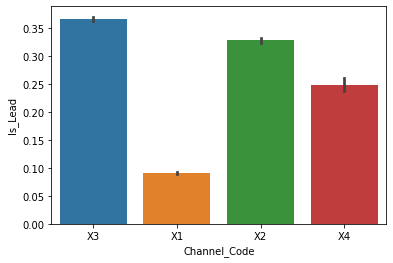

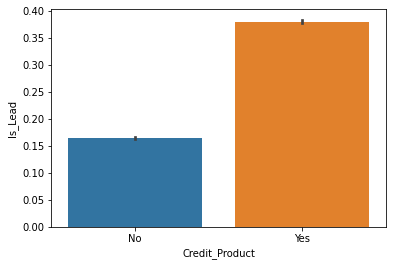

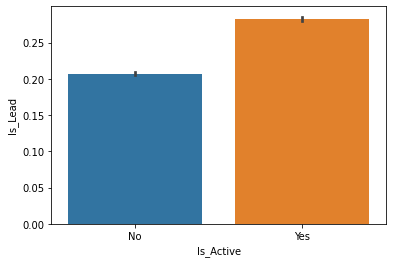

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,cat],axis=1,join='inner')

from numpy import mean
for col in (cat.columns):
    plt.figure()
    #sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="Is_Lead",data=X_char_merged, estimator=mean )
plt.show()

# All categorical features can be good predictors.